In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Read the CSV file

In [380]:
df = pd.read_csv('/content/ElectricCarData_Norm.csv')
df.head()

,Brand,Model,Accel_sec,TopSpeed_km_per_h,Range_km,Efficiency_wh_per_km,FastCharge_km_per_h,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [381]:
df.shape

(103, 14)

Datatype of columns

In [382]:
df.dtypes

Brand                    object
Model                    object
Accel_sec               float64
TopSpeed_km_per_h         int64
Range_km                  int64
Efficiency_wh_per_km      int64
FastCharge_km_per_h      object
RapidCharge              object
PowerTrain               object
PlugType                 object
BodyStyle                object
Segment                  object
Seats                     int64
PriceEuro                 int64
dtype: object

In [383]:
df.describe()

,Accel_sec,TopSpeed_km_per_h,Range_km,Efficiency_wh_per_km,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


Droping rows with NULL values

In [384]:
df1 = df[df.FastCharge_km_per_h !='-']
df1.shape

(98, 14)

Convert Object to Float

In [385]:
df1.FastCharge_km_per_h=pd.to_numeric(df1.FastCharge_km_per_h)
df1.dtypes

<ipython-input-385-6e6f3835c597>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.FastCharge_km_per_h=pd.to_numeric(df1.FastCharge_km_per_h)


Brand                    object
Model                    object
Accel_sec               float64
TopSpeed_km_per_h         int64
Range_km                  int64
Efficiency_wh_per_km      int64
FastCharge_km_per_h       int64
RapidCharge              object
PowerTrain               object
PlugType                 object
BodyStyle                object
Segment                  object
Seats                     int64
PriceEuro                 int64
dtype: object

Visualization

In [396]:
df2 = df1
df2.head()

,Brand,Model,Accel_sec,TopSpeed_km_per_h,Range_km,Efficiency_wh_per_km,FastCharge_km_per_h,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


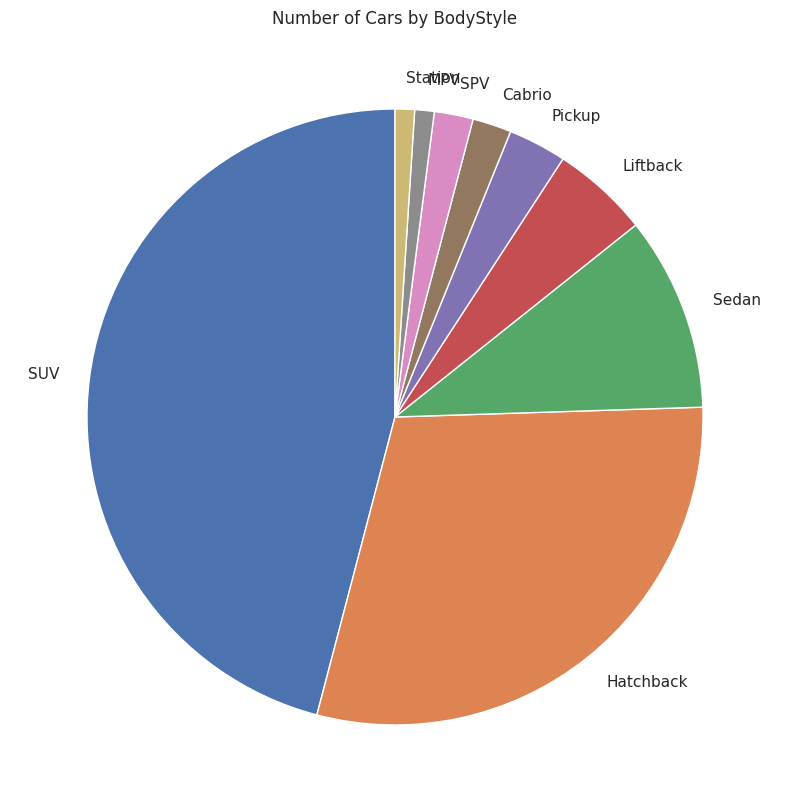

In [399]:
car_counts = df2['BodyStyle'].value_counts()

# Create a pie chart using seaborn
plt.figure(figsize=(12, 10))

plt.pie(car_counts, labels=car_counts.index, autopct=' ', startangle=90)
plt.title('Number of Cars by BodyStyle')
plt.show()

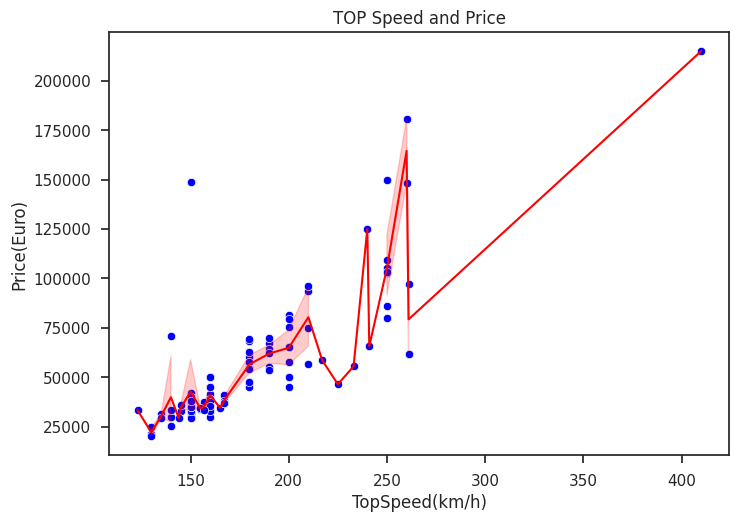

In [400]:
sns.set(style='ticks')

# Create the scatter plot
sns.scatterplot(data=df2, x='TopSpeed_km_per_h', y='PriceEuro', color='blue', marker='o')

# Add a line plot to connect the highest speed and price points
sns.lineplot(data=df2, x='TopSpeed_km_per_h', y='PriceEuro', color='red')

# Set the plot title and axis labels
plt.title('TOP Speed and Price')
plt.xlabel('TopSpeed(km/h)')
plt.ylabel('Price(Euro)')

# Show the plot
plt.show()

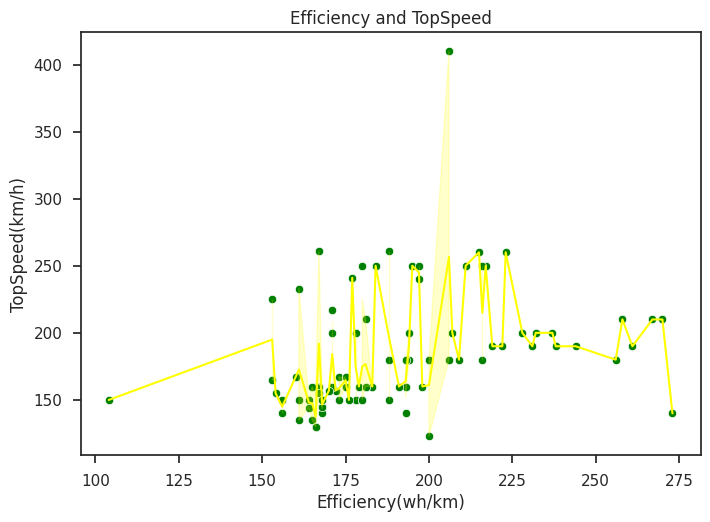

In [401]:
sns.scatterplot(data=df2, x='Efficiency_wh_per_km', y='TopSpeed_km_per_h', color='green', marker='o')
sns.lineplot(data=df2, x='Efficiency_wh_per_km', y='TopSpeed_km_per_h', color='yellow')

# Set the plot title and axis labels
plt.title('Efficiency and TopSpeed')
plt.xlabel('Efficiency(wh/km)')
plt.ylabel('TopSpeed(km/h)')

# Show the plot
plt.show()

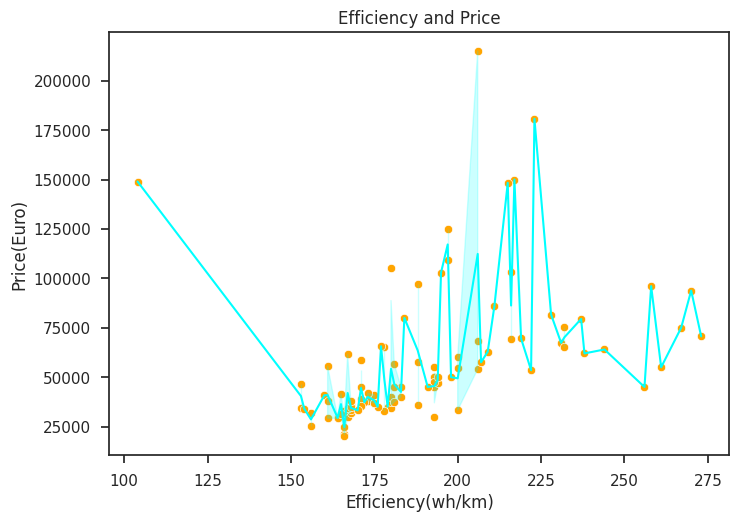

In [402]:
sns.scatterplot(data=df2, x='Efficiency_wh_per_km', y='PriceEuro', color='orange', marker='o')
sns.lineplot(data=df2, x='Efficiency_wh_per_km', y='PriceEuro', color='cyan')

# Set the plot title and axis labels
plt.title('Efficiency and Price')
plt.xlabel('Efficiency(wh/km)')
plt.ylabel('Price(Euro)')

# Show the plot
plt.show()

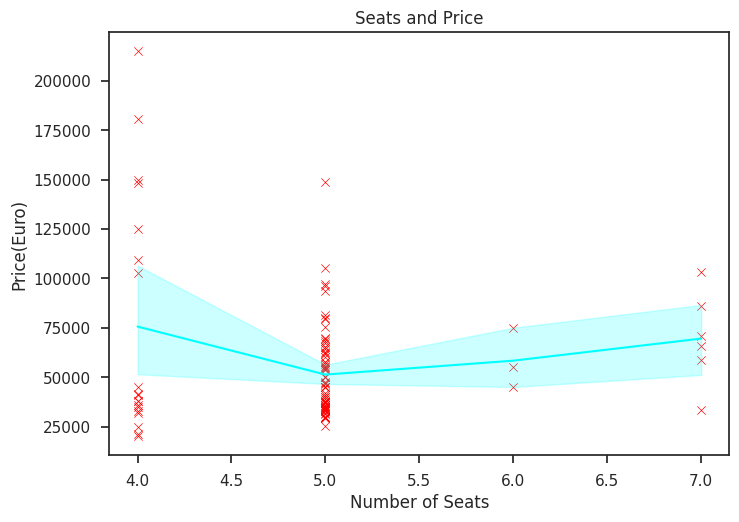

In [403]:
sns.scatterplot(data=df2, x='Seats', y='PriceEuro', color='red', marker='x')
sns.lineplot(data=df2, x='Seats', y='PriceEuro', color='cyan')

# Set the plot title and axis labels
plt.title('Seats and Price')
plt.xlabel('Number of Seats')
plt.ylabel('Price(Euro)')

# Show the plot
plt.show()

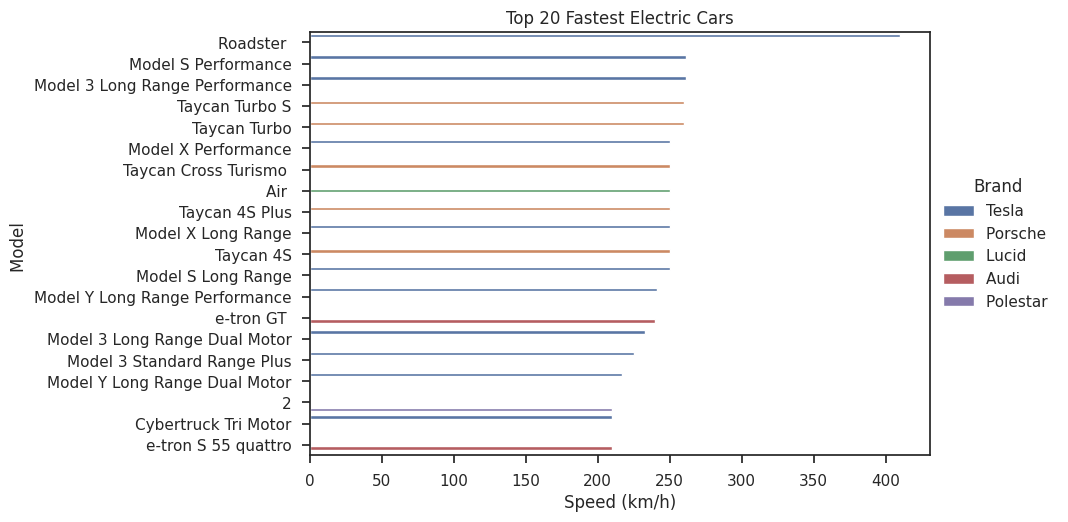

In [404]:
top_20_fastest = df.sort_values('TopSpeed_km_per_h', ascending=False).head(20)

# Create a bar plot to visualize the top 20 fastest cars
sns.barplot(data=top_20_fastest, x='TopSpeed_km_per_h', y='Model', hue='Brand')
plt.title('Top 20 Fastest Electric Cars')
plt.xlabel('Speed (km/h)')
plt.ylabel('Model ')
plt.legend(title='Brand', loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

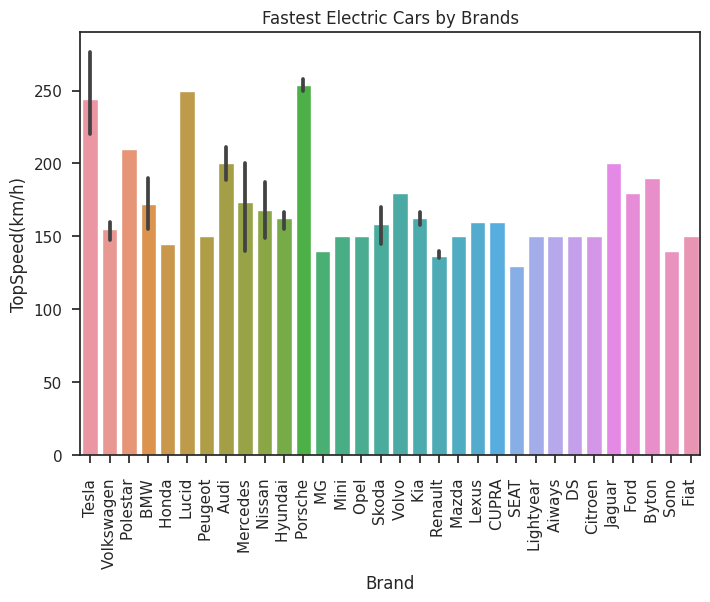

In [405]:
sns.barplot(data=df2, x='Brand', y='TopSpeed_km_per_h')
plt.title('Fastest Electric Cars by Brands')
plt.xlabel('Brand')
plt.ylabel('TopSpeed(km/h)')
plt.xticks(rotation=90)
plt.show()

In [406]:
df_old = df2

Mapping categorical columns to numeric values.

In [407]:
unique_values = df2['RapidCharge'].unique()

# Print the unique values
print(unique_values)

['Rapid charging possible']


In [408]:
unique_values = df2['PowerTrain'].unique()

# Print the unique values
print(unique_values)

['All Wheel Drive' 'Rear Wheel Drive' 'Front Wheel Drive']


In [ ]:
mapping = {'Rear Wheel Drive' : 0 , 'Front Wheel Drive' : 1, 'All Wheel Drive' : 2}
df2['PowerTrain'] = df2['PowerTrain'].map(mapping)

In [410]:
unique_values = df2['BodyStyle'].unique()

# Print the unique values
print(unique_values)

['Sedan' 'Hatchback' 'Liftback' 'SUV' 'Pickup' 'MPV' 'Cabrio' 'SPV'
 'Station']


In [ ]:
mapping = {'Sedan' : 0 , 'Hatchback' : 1, 'Liftback' : 2, 'SUV': 3, 'Pickup': 4 , 'MPV':5, 'Cabrio':6 , 'SPV':7, 'Station':8}
df2['BodyStyle'] = df2['BodyStyle'].map(mapping)

Drop Useless columns

In [412]:
df2.head(1)

,Brand,Model,Accel_sec,TopSpeed_km_per_h,Range_km,Efficiency_wh_per_km,FastCharge_km_per_h,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,2,Type 2 CCS,0,D,5,55480


In [413]:
df2 = df2.drop('Model',axis=1)


In [414]:
df2 = df2.drop('RapidCharge',axis=1)

In [415]:
df2 = df2.drop('Segment',axis=1)

In [416]:
df2 = df2.drop('PlugType',axis=1)

In [417]:
df2 = df2.drop('Brand',axis=1)

Preprocessing forK-Means Clustering

In [418]:
df2.head(2)

,Accel_sec,TopSpeed_km_per_h,Range_km,Efficiency_wh_per_km,FastCharge_km_per_h,PowerTrain,BodyStyle,Seats,PriceEuro
0,4.6,233,450,161,940,2,0,5,55480
1,10.0,160,270,167,250,0,1,5,30000


Use Robult scaler for scaling, it is robst to the outliers scale the data in interquartile range.

In [420]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df2)
df3 = pd.DataFrame(robust_df, columns =df2.columns)

In [421]:
df3.shape

(98, 9)

Applying PCA

In [422]:
from sklearn.decomposition import PCA  # Replace with the desired number of components
pca = PCA(0.95)

# Apply PCA to the data in one step
X_pca = pca.fit_transform(df3)
n_components = 7
# Create a new DataFrame with the PCA-transformed data
df4 = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

df4.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.388088,-1.436838,-1.530647,-0.291693,0.395170,-0.346903,-0.465491
1,-1.894228,-0.527815,-0.154070,0.443409,-0.281675,0.478496,0.172742


Elbow method for choosing the number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

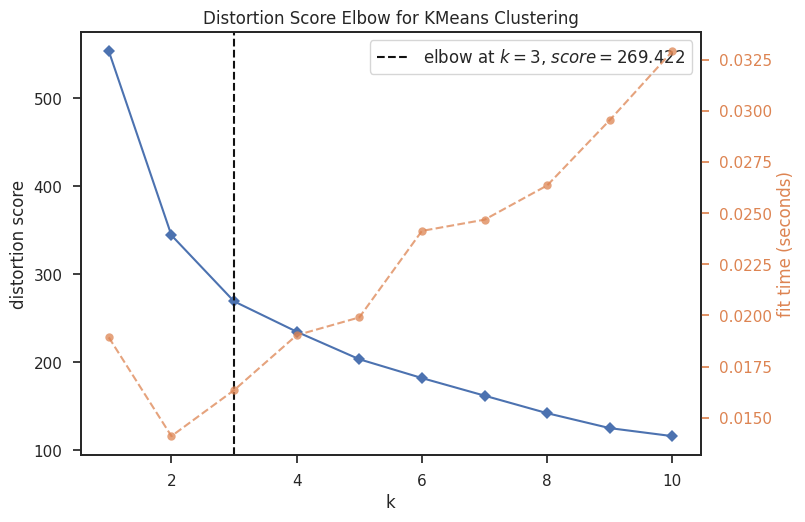

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [423]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(df4)
visualizer.show()

K-Mean clustering for number of clusters 3

In [424]:
from sklearn.cluster import KMeans
n_clusters = 3  # Replace with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the data to the KMeans model and predict the cluster labels
kmeans.fit(df4)
labels = kmeans.predict(df4)

# Add the cluster labels to the DataFrame
df4['Cluster'] = labels

# Display the DataFrame with cluster assignments
print(df4)

         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   1.388088 -1.436838 -1.530647 -0.291693  0.395170 -0.346903 -0.465491   
1  -1.894228 -0.527815 -0.154070  0.443409 -0.281675  0.478496  0.172742   
2   0.894897 -0.296647 -0.592903 -0.360242  0.410476 -0.406863 -0.371894   
3   0.128103  0.224753  0.178142  0.892473 -0.944090  0.385962 -0.120284   
4  -2.269866 -0.943807  0.774053  0.054029 -0.508489  0.252921 -0.154193   
..       ...       ...       ...       ...       ...       ...       ...   
93 -0.623492 -0.304529 -0.313902 -0.258215 -0.293027  0.085914  0.314754   
94  1.907828  0.884387  0.684306 -0.972596 -0.737165  0.245985  0.013358   
95  0.248251 -0.312485 -0.380360 -0.960244  0.174596 -0.106693 -0.062100   
96  0.956093  0.079461 -0.161055 -1.141547 -0.501565 -0.106270  0.386400   
97  0.811148  0.919749  0.195197 -0.658102 -0.297990 -0.422495  0.371115   

    Cluster  
0         0  
1         1  
2         0  
3         1  
4         1  
.. 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting of Cluster Centers

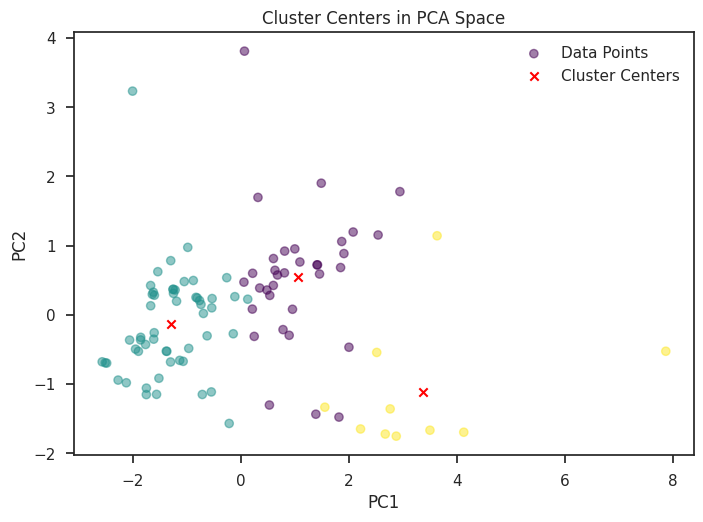

In [425]:
cluster_centers_pca = kmeans.cluster_centers_

# Create a scatter plot of the data points in the PCA space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Data Points')

# Create a scatter plot of the cluster centers in the PCA space
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='x', label='Cluster Centers')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Centers in PCA Space')
plt.legend()
plt.show()

In [426]:
df_old['Cluster'] = labels
df_old.head(1)

<ipython-input-426-d00196436174>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old['Cluster'] = labels


,Brand,Model,Accel_sec,TopSpeed_km_per_h,Range_km,Efficiency_wh_per_km,FastCharge_km_per_h,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Cluster
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,2,Type 2 CCS,0,D,5,55480,0


Cluster number and price relation

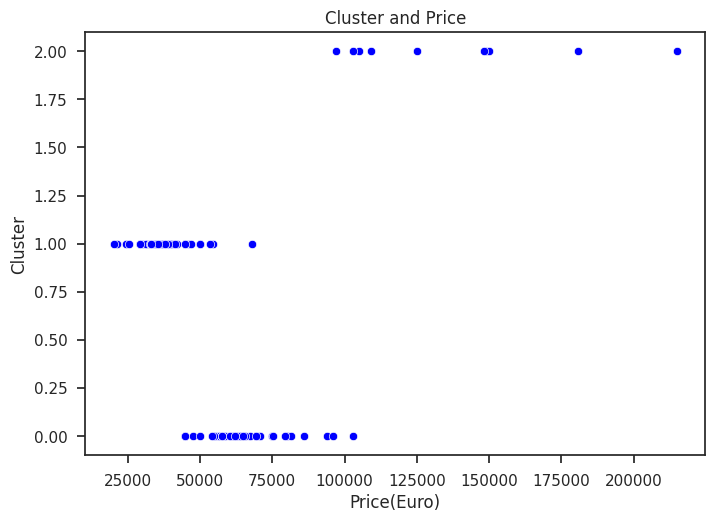

In [427]:
sns.scatterplot(data=df_old, x='PriceEuro', y='Cluster', color='blue', marker='o')
#sns.lineplot(data=df_old, x='PriceEuro', y='Cluster', color='cyan')

# Set the plot title and axis labels
plt.title('Cluster and Price')
plt.xlabel('Price(Euro)')
plt.ylabel('Cluster')

# Show the plot
plt.show()